<a href="https://colab.research.google.com/github/RaoEhsanElahi/Coordinate-Search-Algorithm/blob/main/ANN_A1_CoordinateSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pseudo-code for the coordinate search algorithm
## Devising pseudo-code for the coordinate search algorithm described in Section 2.6.1 of Book “Machine Learning Refined".

## Implements the coordinate search algorithm to find a minimum of a function f.
  ## Args:
      f: The function to optimize.
      x_init: The initial guess for the minimum.
      max_iter: The maximum number of iterations allowed.
      step_size: The step size to use for coordinate updates.

  ## Returns:
      x_min: The approximate minimum found by the algorithm.
      f_min: The function value at the approximate minimum.


Approximate minimum: [1.]
Function value at minimum: [8.]


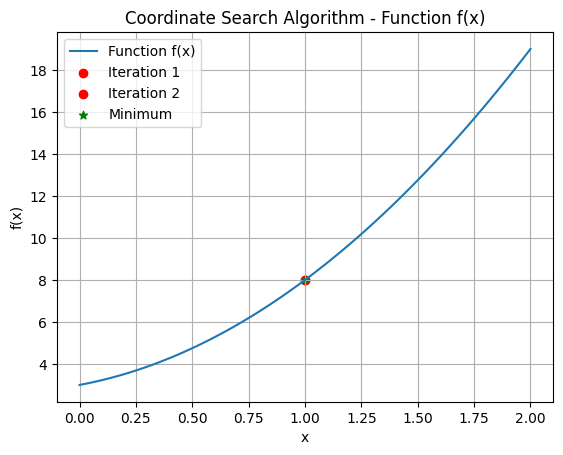

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  # function for coordinate search
  return (3)*(x**2) + 2*x + 3

def coordinate_search(f, x_init, max_iter, step_size):

  x = x_init.copy()  # Creates a copy to avoid modifying input
  f_min = f(x)
  iter_count = 0
  x_history = [x.copy()]  # Array to Track history of x values for visualization

  # coordinate search
  while iter_count < max_iter:
    improved = False

    # Loop through each dimension (coordinate)
    for i in range(len(x)):
      # Try positive and negative step sizes in the current dimension
      x_pos = x.copy()
      x_pos[i] += step_size
      f_pos = f(x_pos)

      x_neg = x.copy()
      x_neg[i] -= step_size
      f_neg = f(x)

      # Update x and f_min if a better value is found
      if f_pos < f_min:
        x = x_pos.copy()
        f_min = f_pos
        improved = True
      elif f_neg < f_min:
        x = x_neg.copy()
        f_min = f_neg
        improved = True

    x_history.append(x.copy())  # Add current x to history
    # Early termination if no improvement within an iteration
    if not improved:
      break

    iter_count += 1

  return x, f_min, x_history

def plot_results(f, x_history, f_min, x_min):    # Plots the function and the path of the coordinate search algorithm.

  x_range = np.linspace(min(x_history, key=lambda x: x[0])[0] - 1,
                        max(x_history, key=lambda x: x[0])[0] + 1, 100)
  y = f(x_range)
  plt.plot(x_range, y, label='Function f(x)')

  for i, x in enumerate(x_history):
    plt.scatter(x[0], f(x), marker='o', color='red', label=f'Iteration {i+1}')

  plt.scatter(x_min[0], f_min, marker='*', color='green', label='Minimum')
  plt.xlabel('x')
  plt.ylabel('f(x)')
  plt.legend()
  plt.title('Coordinate Search Algorithm - Function f(x)')
  plt.grid(True)
  plt.show()

if __name__ == '__main__':
  x_init = np.array([1.0])  # Initial guess (as a NumPy array)
  max_iter = 100
  step_size = 0.1

  x_min, f_min, x_history = coordinate_search(f, x_init, max_iter, step_size)

  print("Approximate minimum:", x_min)
  print("Function value at minimum:", f_min)

  plot_results(f, x_history, f_min, x_min)


**Coordinate Search Algorithm**

**Inputs:**
  - `f`: The function to optimize (represented as a function pointer or lambda expression)
  - `x_init`: The initial guess for the minimum (as a list or array)
  - `max_iter`: The maximum number of iterations allowed (integer)
  - `step_size`: The step size to use for coordinate updates (float)

**Outputs:**
  - `x_min`: The approximate minimum found by the algorithm (list or array)
  - `f_min`: The function value at the approximate minimum (float)

**1. Initialization:**
    - Create a copy of `x_init` to avoid modifying the input (store as `x`).
    - Set `f_min` to the function value evaluated at `x` (f(x)).
    - Initialize an iteration counter (`iter_count`) to 0.
    - Optionally, create an empty list `x_history` to track visited points for visualization (if needed).

**2. Main Loop:**

    - While `iter_count` is less than `max_iter`:
        - Set a flag `improved` to `False`.
        - Loop through each dimension `i` in `x`:
            - Create two copies of `x`:
                - `x_pos` with a positive `step_size` added to the current dimension `i`.
                - `x_neg` with a negative `step_size` subtracted from the current dimension `i`.
            - Evaluate the function at `x_pos` and `x_neg` (store as `f_pos` and `f_neg`).
            - If `f_pos` is less than `f_min`:
                - Update `x` to `x_pos` and `f_min` to `f_pos`.
                - Set `improved` to `True`.
            - Else if `f_neg` is less than `f_min`:
                - Update `x` to `x_neg` and `f_min` to `f_neg`.
                - Set `improved` to `True`.
        - Optionally, append the current `x` to `x_history` (for visualization).
        - If `improved` is `False`, break the loop (no improvement in this iteration).
        - Increment `iter_count`.

**3. Return:**

    - Return `x_min`, `f_min`, and optionally `x_history` (if tracked).
  

# Coordinate search with diminishing steplength
Implement the coordinate search algorithm detailed in Section 2.6.1 and use it
to minimize the function:

`g(w1, w2) = 0.26 ± w21 + w22² - 0.48 w1w2`

using the diminishing steplength rule beginning at a random initial point. The
global minimum of this function lies at the origin. Test your implementation
by making sure it can reach a point significantly close (e.g., within 10-²
) to the
origin from various random initializations.

In [14]:
import numpy as np

def g(w1, w2):  #Function to be minimized.
  return 0.26 + w1**2 + w2**2 - 0.48 * w1 * w2

def coordinate_search(f, x_init, max_iter, initial_step_size, decay_rate):

  x = x_init.copy()
  f_min = f(x[0], x[1])  # Call g with unpacked elements of x
  step_size = initial_step_size
  iter_count = 0

  while iter_count < max_iter:
    improved = False

    for i in range(len(x)):
      x_pos = x.copy()
      x_pos[i] += step_size
      f_pos = f(x_pos[0], x_pos[1])  # unpacked elements of x_pos

      x_neg = x.copy()
      x_neg[i] -= step_size
      f_neg = f(x_neg[0], x_neg[1])  # unpacked elements of x_neg

      # Update x and f_min
      if f_pos < f_min:
        x = x_pos.copy()
        f_min = f_pos
        improved = True
      elif f_neg < f_min:
        x = x_neg.copy()
        f_min = f_neg
        improved = True

    step_size *= decay_rate

    if not improved:
      break

    iter_count += 1

  return x, f_min

num_tests = 5
max_iter = 100
initial_step_size = 0.1
decay_rate = 0.9

for _ in range(num_tests):
  x_init = np.random.rand(2) - 0.5  # Random values between -0.5 and 0.5

  x_min, f_min = coordinate_search(g, x_init, max_iter, initial_step_size, decay_rate)

  print(f"Initial guess: {x_init}")
  print(f"Minimum found: {x_min}")
  print(f"Function value at minimum: {f_min}")
  print(f"Distance to origin: {np.linalg.norm(x_min)}")
  print("-" * 20)


Initial guess: [ 0.42036489 -0.40552934]
Minimum found: [0.01085489 0.00398066]
Function value at minimum: 0.2601129336215298
Distance to origin: 0.011561757982789493
--------------------
Initial guess: [-0.05581646 -0.14790878]
Minimum found: [-0.05581646 -0.04790878]
Function value at minimum: 0.26412716071373676
Distance to origin: 0.07355765002035809
--------------------
Initial guess: [0.33888928 0.35640124]
Minimum found: [-0.00501072  0.01250124]
Function value at minimum: 0.2602114555543916
Distance to origin: 0.013468045945332848
--------------------
Initial guess: [ 0.16003844 -0.18143873]
Minimum found: [-0.02996156  0.00856127]
Function value at minimum: 0.2610941150278333
Distance to origin: 0.031160723250182223
--------------------
Initial guess: [-0.3297989  0.2987959]
Minimum found: [0.0141011 0.0277959]
Function value at minimum: 0.26078331571756885
Distance to origin: 0.03116814213516327
--------------------
